In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv', parse_dates=['data'])
df = df[['data', 'nuovi_positivi']]
df['data'] = pd.to_datetime(df['data']).dt.normalize()
df = df.loc[(df['data'] >= '2021-03-01') & (df['data'] < '2023-05-01')]

In [3]:
x = df.groupby([pd.Grouper(key='data', freq='W-MON')])['nuovi_positivi'].sum()

In [4]:
df_italy = pd.DataFrame(x)

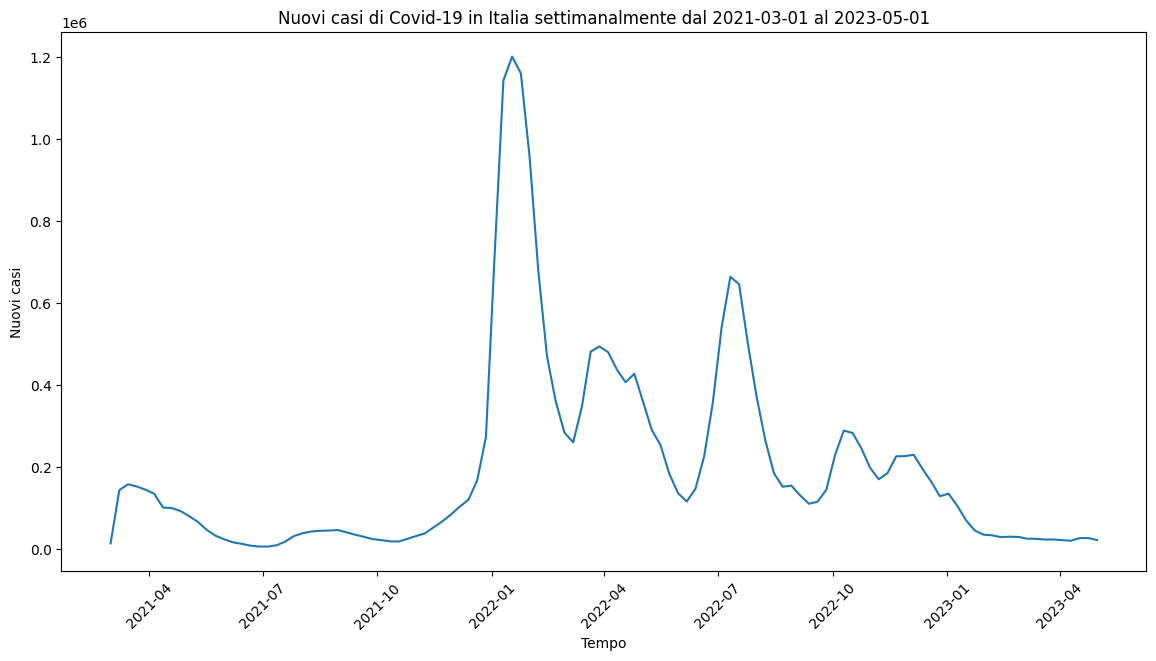

In [5]:
plt.rcParams['figure.figsize'] = [14, 7]
# Create the plot
plt.plot(df_italy.index, df_italy.nuovi_positivi, linestyle='solid')

# Add title and axis labels
plt.title('Nuovi casi di Covid-19 in Italia settimanalmente dal 2021-03-01 al 2023-05-01')
plt.xlabel('Tempo')
plt.ylabel('Nuovi casi')
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [6]:
result = adfuller(df_italy)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('lags used: %f' % result[2])
print('observations: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.301244
p-value: 0.171567
lags used: 5.000000
observations: 108.000000
Critical Values:
	1%: -3.492
	5%: -2.889
	10%: -2.581


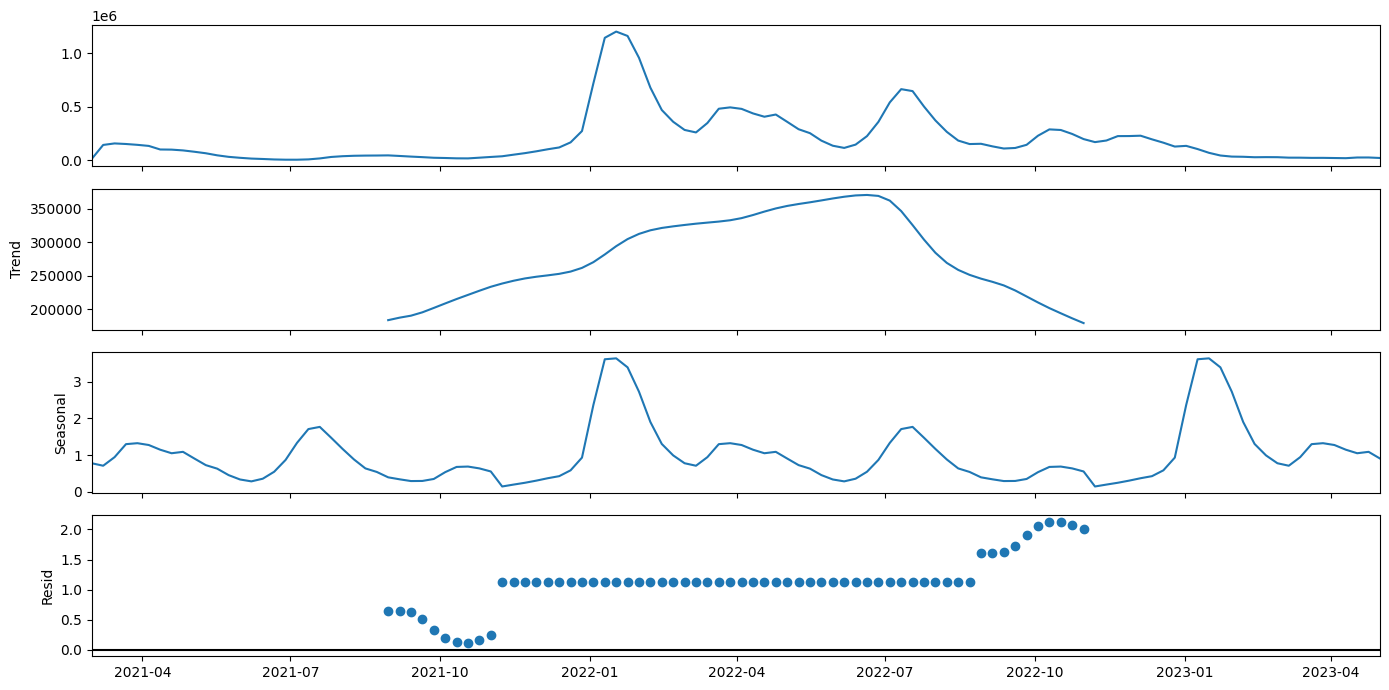

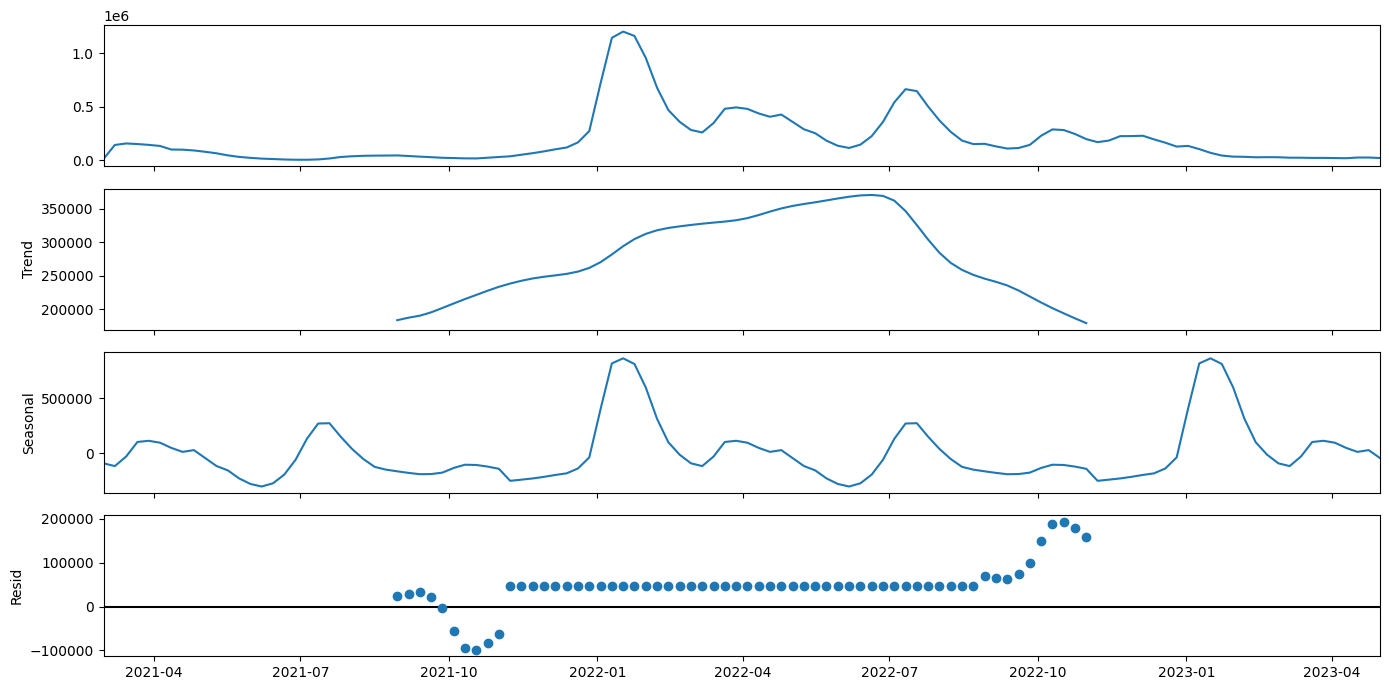

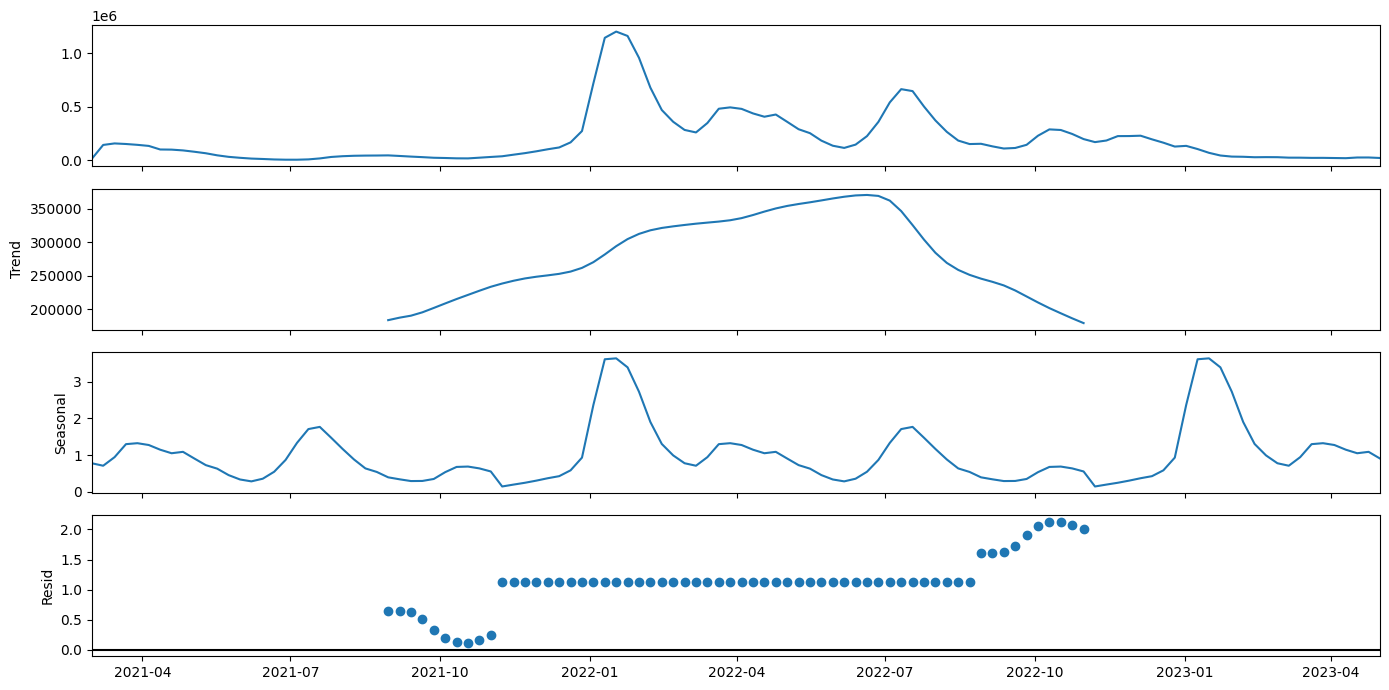

In [30]:
seasonal_decompose(df_italy, model='additive').plot()
seasonal_decompose(df_italy, model='multiplicative').plot()

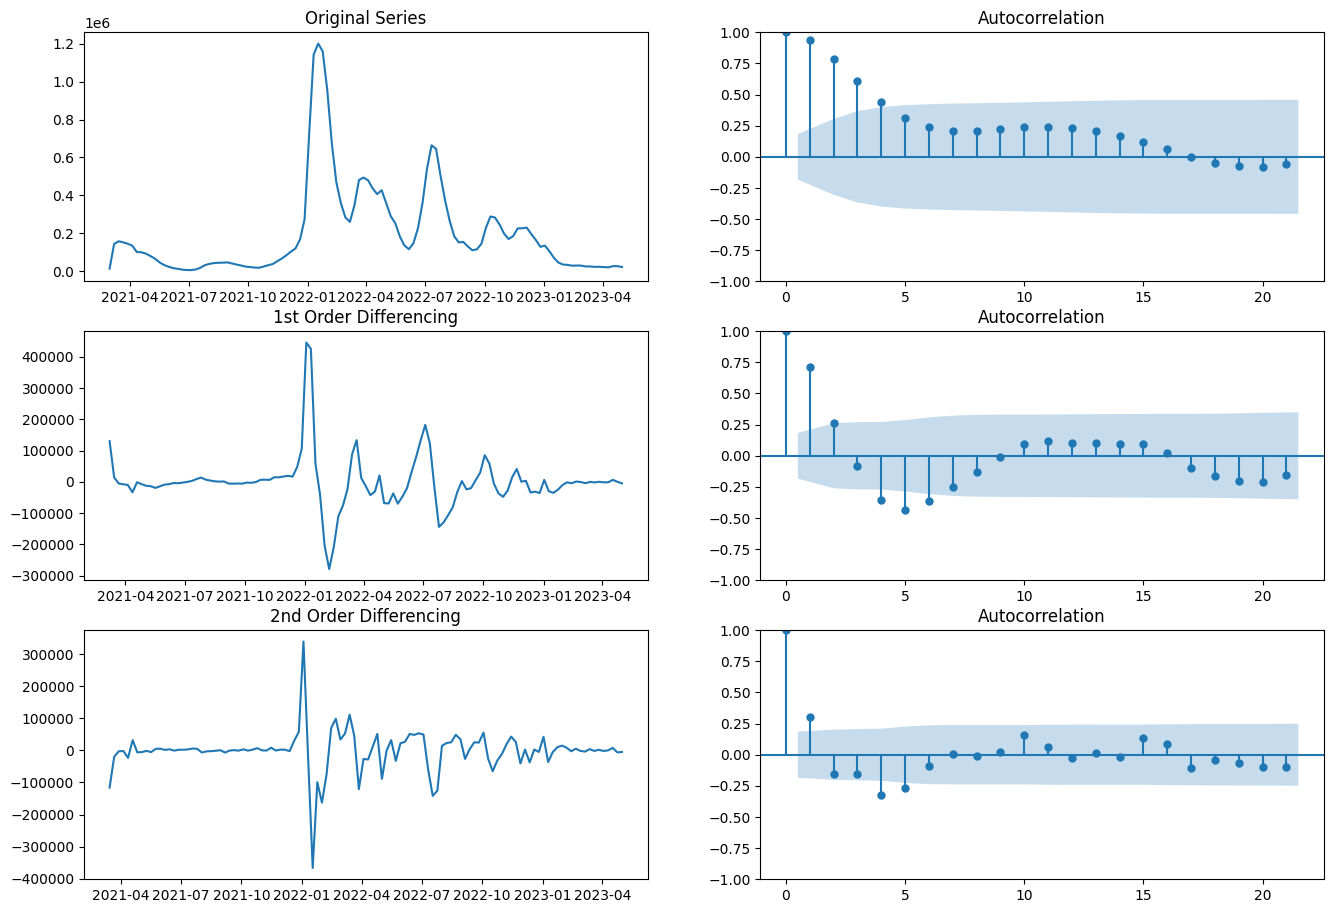

In [32]:
plt.rcParams['figure.figsize'] = [16, 11]
fig, axes = plt.subplots(3, 2)
axes[0, 0].plot(df_italy)
axes[0, 0].set_title('Original Series')
plot_acf(df_italy.nuovi_positivi, ax=axes[0, 1])

axes[1, 0].plot(df_italy.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_italy.nuovi_positivi.diff().dropna(), ax=axes[1, 1])

axes[2, 0].plot(df_italy.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_italy.nuovi_positivi.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [24]:
result = adfuller(df_italy.nuovi_positivi.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('lags used: %f' % result[2])
print('observations: %f' % result[3])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.934018
p-value: 0.000000
lags used: 3.000000
observations: 109.000000
Critical Values:
	1%: -3.492
	5%: -2.888
	10%: -2.581


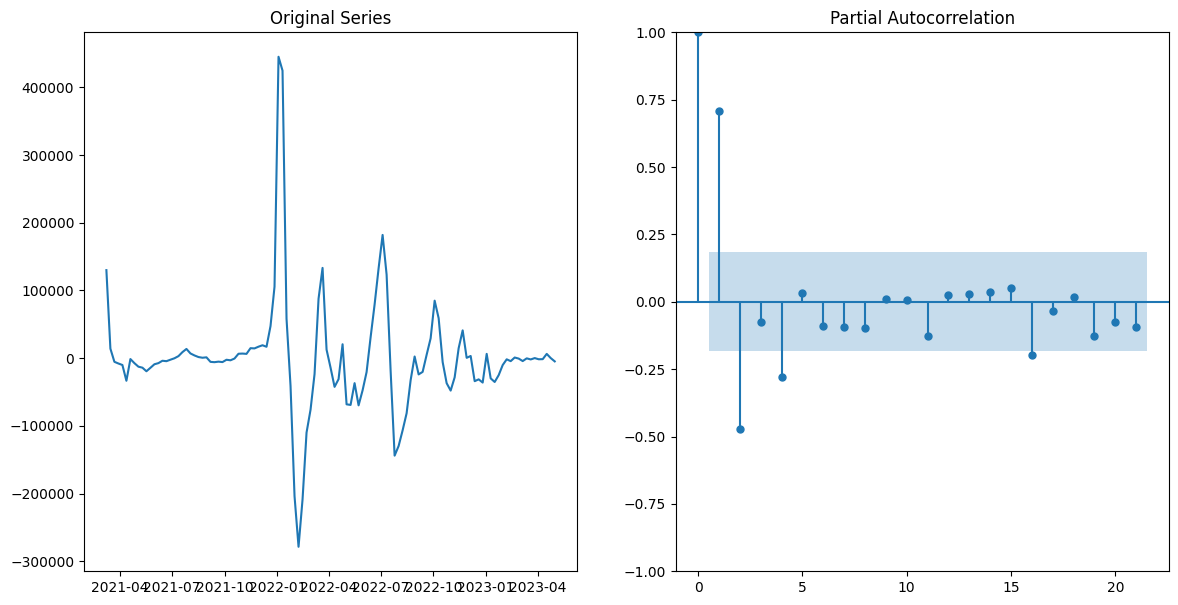

In [9]:
fig, axes = plt.subplots(1, 2)
axes[0].plot(df_italy.diff())
axes[0].set_title('Original Series')
axes[1].set(ylim=(0, 5))
plot_pacf(df_italy.diff().dropna(), ax=axes[1])
plt.show()

### ARIMA

In [10]:
results=pm.auto_arima(df_italy, start_p=0, d=None, start_q=0, max_p=3, max_q=4,
                      seasonal=False, m=0, D=None, test='adf', start_P=0, start_Q=0, max_P=3, max_Q=3, #seasonal=True, m=7
                      information_criterion='aic', trace=True, error_action='ignore',
                      trend=None,with_intercept=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2887.935, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2810.506, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2803.620, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2885.940, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2783.613, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2781.102, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2782.304, Time=0.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2782.138, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2775.153, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2785.685, Time=0.13 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2774.656, Time=0.12 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2776.505, Time=0.14 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2775.175, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0]             : AIC=2772.684, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0]          

In [42]:
model = ARIMA(df_italy, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:         nuovi_positivi   No. Observations:                  114
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1387.811
Date:                Sat, 09 Mar 2024   AIC                           2781.622
Time:                        13:14:02   BIC                           2789.804
Sample:                    03-01-2021   HQIC                          2784.942
                         - 05-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4611      0.072      6.449      0.000       0.321       0.601
ma.L1          0.6772      0.071      9.545      0.000       0.538       0.816
sigma2       2.94e+09   2.58e-11   1.14e+20      0.0

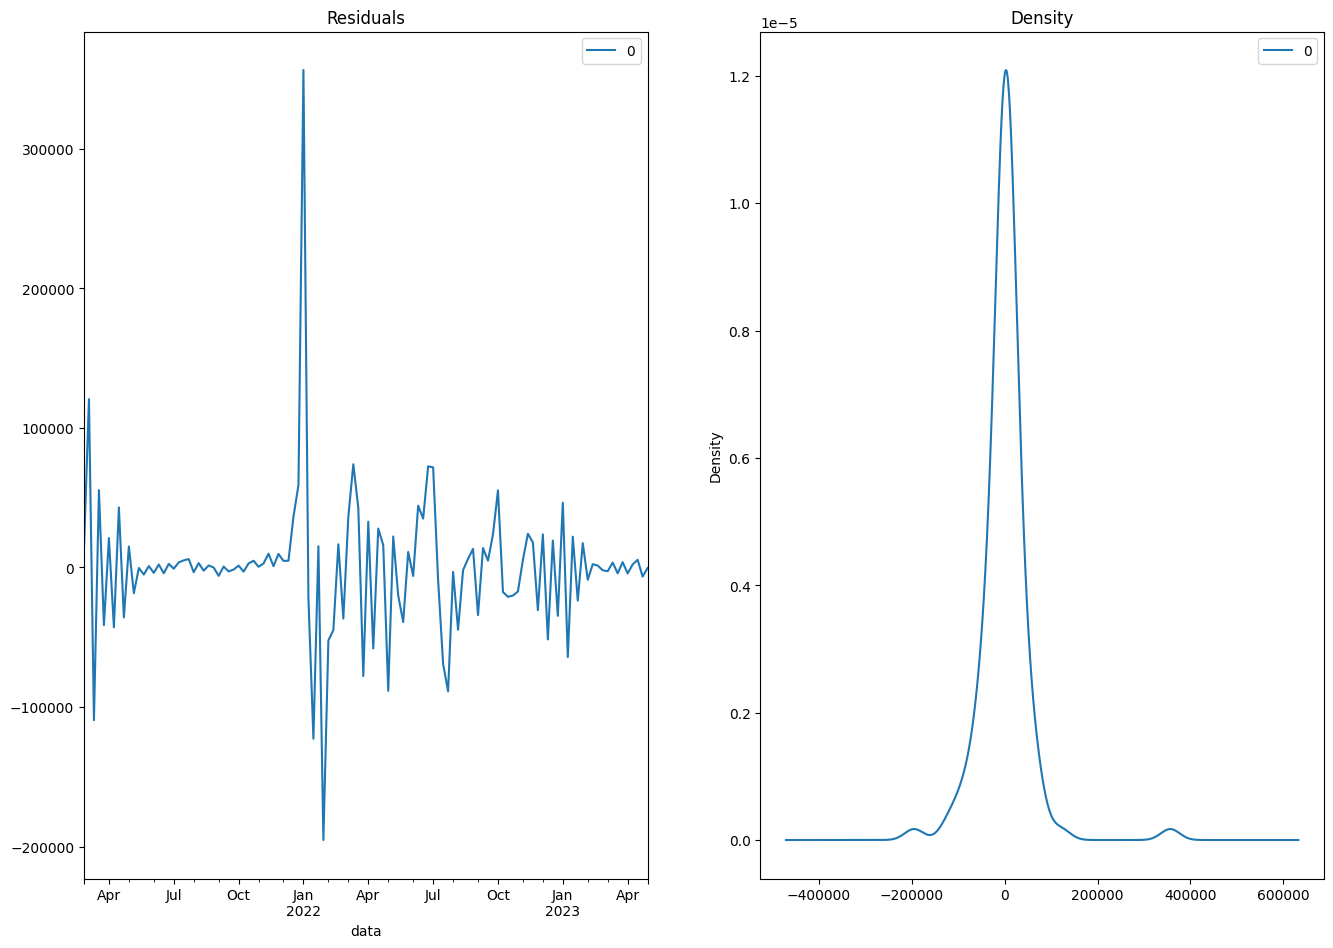

In [35]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

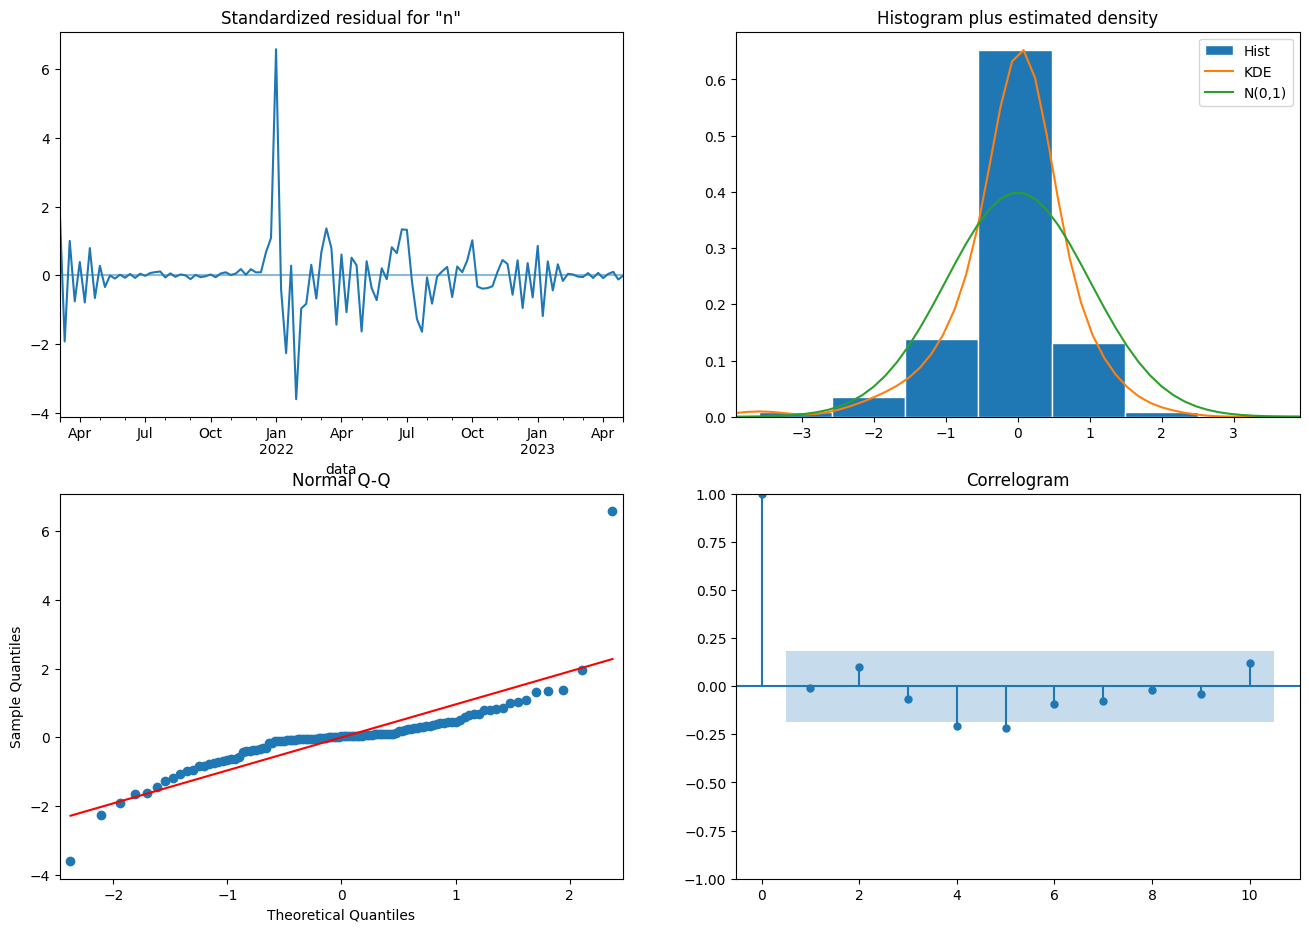

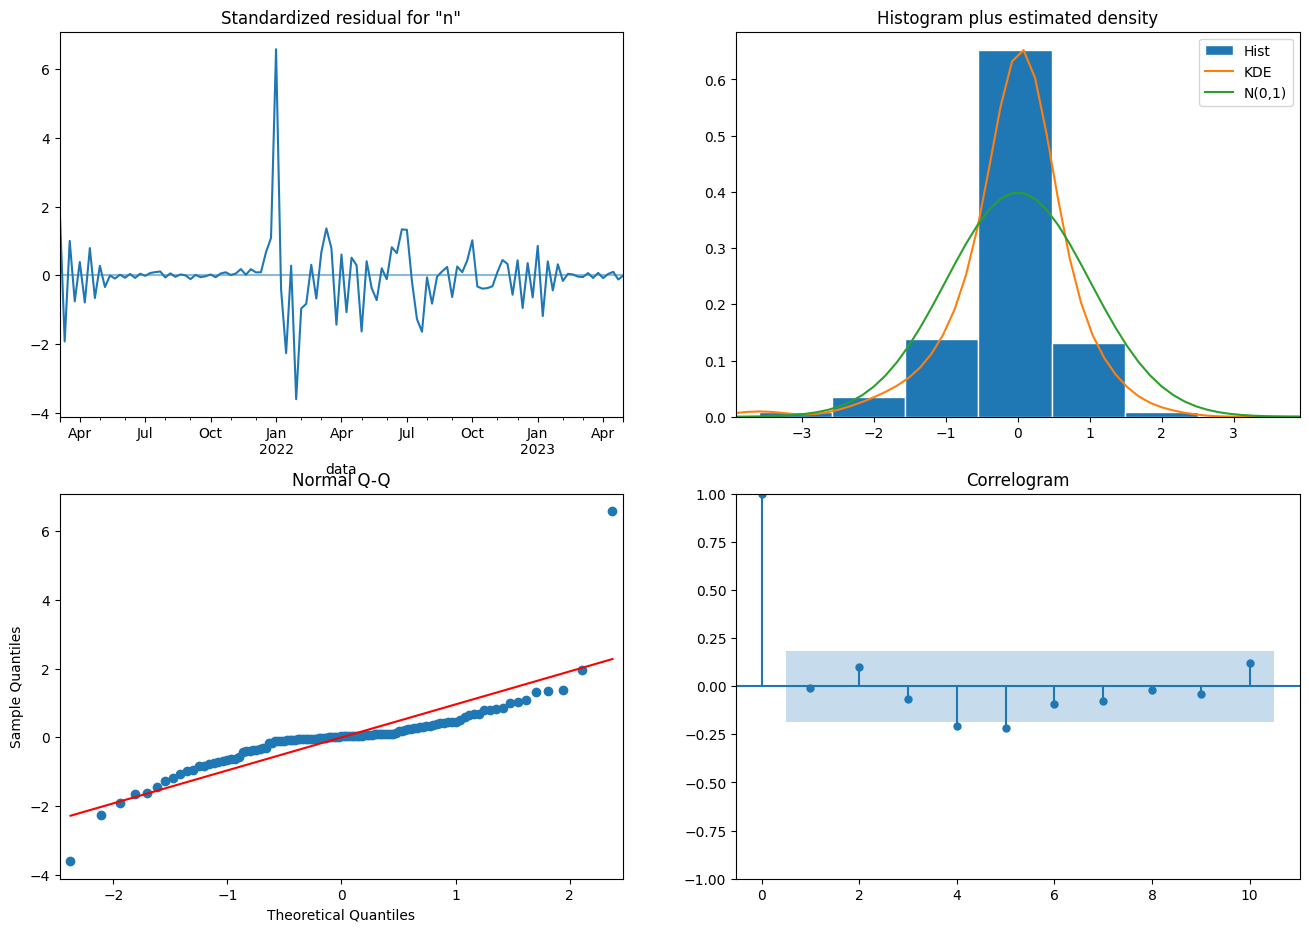

In [36]:
model_fit.plot_diagnostics()

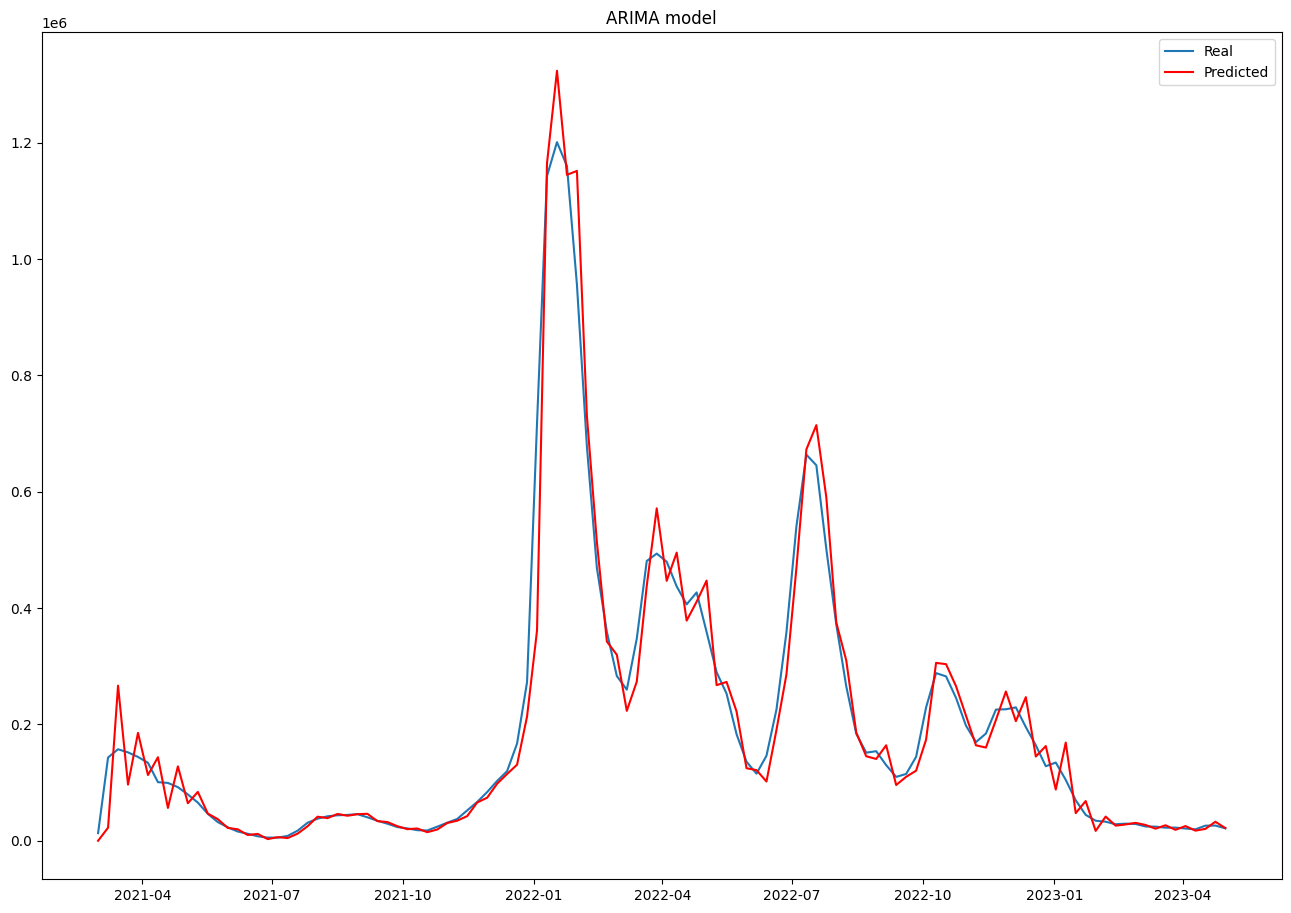

In [37]:
predictions = model_fit.predict(dynamic=False)
plt.plot(df_italy)
plt.plot(predictions, color='red')
plt.title('ARIMA model')
plt.legend(['Real', 'Predicted'])
plt.show()

In [57]:
# Split dataset
train = df_italy[:int(0.9*len(df_italy))]
test = df_italy[int(0.9*len(df_italy)):]

# Model
model = ARIMA(train, order=(1, 1, 1))
fitted = model.fit()

forecast_window = len(df_italy) - int(0.9*len(df_italy)) # forecasting window

forecast = fitted.get_forecast(steps=forecast_window, alpha=0.05)
mean_forecast = forecast.predicted_mean

#Confidence Intervals for forecasting
confi_int_f = forecast.conf_int()
lower_limits_f = confi_int_f.iloc[:,0]
upper_limits_f = confi_int_f.iloc[:,1]
arima_forecast = pd.DataFrame({'yhat':mean_forecast, 'y_lower':lower_limits_f, 'y_upper':upper_limits_f})

c:\Users\chris\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


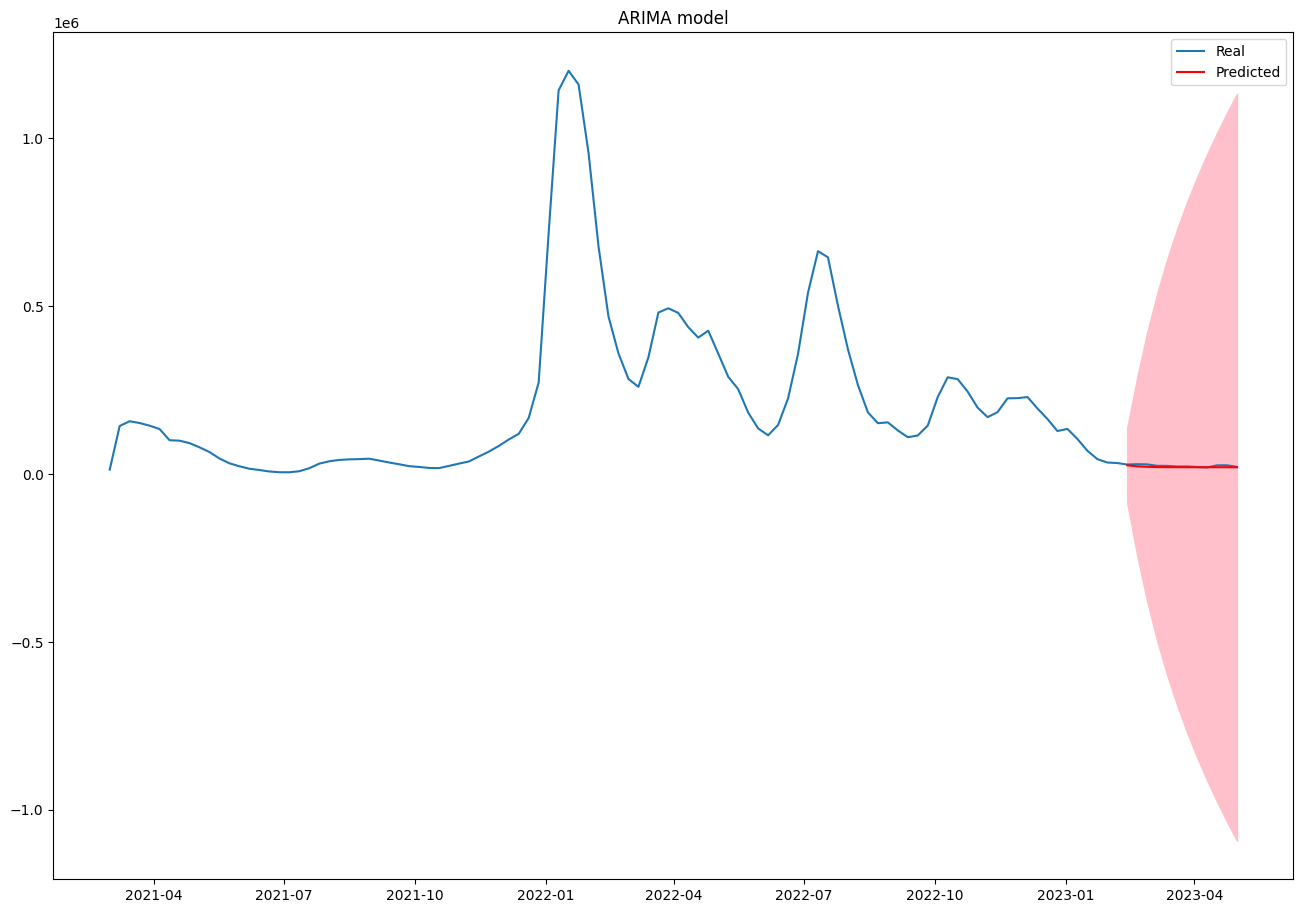

In [58]:
plt.plot(df_italy, label='Observed')
plt.plot(arima_forecast['yhat'], color='red', label='Predicted')
plt.fill_between(arima_forecast.index, arima_forecast['y_lower'], arima_forecast['y_upper'], color='pink')
plt.title('ARIMA model')
plt.legend(['Real', 'Predicted'])
plt.show()

In [52]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-actual)[1]   # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 'acf1':acf1,
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast metrics of: ARIMA')
accuracy_prod = forecast_accuracy(mean_forecast.values, test.values.flatten())
for k, v in accuracy_prod.items():
    print(k, ': ', round(v,4))

Forecast metrics of: ARIMA
mape :  0.732
me :  10554.6595
mae :  22757.0617
acf1 :  0.6986
mpe :  0.6191
rmse :  24904.4097
corr :  0.9586
minmax :  0.4115
